# Final project: Hard drive clasification and anomaly detection 
---
### Description: 
Alumno: Iñaki Sebastián Orozco García

Matrícula: is719276

Materia: Aprendizaje automático

Maestro: Iván Reyes Amezcua

Fecha: 11/13/2024


In [34]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd
import os
import multiprocessing
from sklearn import tree

In [19]:
def process_chunks(file_path):
    chunksize = 10 ** 6
    dtype_dict = {'date': 'str', 'serial_number': 'str', 'model': 'str', 'capacity_bytes': 'int32', 'failure': 'bool', 'datacenter': 'str', 'cluster_id': 'int8', 'vault_id': 'int16', 'pod_id': 'int16', 'pod_slot_num': 'float32', 'is_legacy_format': 'bool', 'smart_1_normalized': 'float64', 'smart_1_raw': 'float64', 'smart_2_normalized': 'float64', 'smart_2_raw': 'float64', 'smart_3_normalized': 'float64', 'smart_3_raw': 'float64', 'smart_4_normalized': 'float64', 'smart_4_raw': 'float64', 'smart_5_normalized': 'float64', 'smart_5_raw': 'float64', 'smart_7_normalized': 'float64', 'smart_7_raw': 'float64', 'smart_8_normalized': 'float64', 'smart_8_raw': 'float64', 'smart_9_normalized': 'float64', 'smart_9_raw': 'float64', 'smart_10_normalized': 'float64', 'smart_10_raw': 'float64', 'smart_11_normalized': 'float64', 'smart_11_raw': 'float64', 'smart_12_normalized': 'float64', 'smart_12_raw': 'float64', 'smart_13_normalized': 'float64', 'smart_13_raw': 'float64', 'smart_15_normalized': 'float64', 'smart_15_raw': 'float64', 'smart_16_normalized': 'float64', 'smart_16_raw': 'float64', 'smart_17_normalized': 'float64', 'smart_17_raw': 'float64', 'smart_18_normalized': 'float64', 'smart_18_raw': 'float64', 'smart_22_normalized': 'float64', 'smart_22_raw': 'float64', 'smart_23_normalized': 'float64', 'smart_23_raw': 'float64', 'smart_24_normalized': 'float64', 'smart_24_raw': 'float64', 'smart_27_normalized': 'float64', 'smart_27_raw': 'float64', 'smart_71_normalized': 'float64', 'smart_71_raw': 'float64', 'smart_82_normalized': 'float64', 'smart_82_raw': 'float64', 'smart_90_normalized': 'float64', 'smart_90_raw': 'float64', 'smart_160_normalized': 'float64', 'smart_160_raw': 'float64', 'smart_161_normalized': 'float64', 'smart_161_raw': 'float64', 'smart_163_normalized': 'float64', 'smart_163_raw': 'float64', 'smart_164_normalized': 'float64', 'smart_164_raw': 'float64', 'smart_165_normalized': 'float64', 'smart_165_raw': 'float64', 'smart_166_normalized': 'float64', 'smart_166_raw': 'float64', 'smart_167_normalized': 'float64', 'smart_167_raw': 'float64', 'smart_168_normalized': 'float64', 'smart_168_raw': 'float64', 'smart_169_normalized': 'float64', 'smart_169_raw': 'float64', 'smart_170_normalized': 'float64', 'smart_170_raw': 'float64', 'smart_171_normalized': 'float64', 'smart_171_raw': 'float64', 'smart_172_normalized': 'float64', 'smart_172_raw': 'float64', 'smart_173_normalized': 'float64', 'smart_173_raw': 'float64', 'smart_174_normalized': 'float64', 'smart_174_raw': 'float64', 'smart_175_normalized': 'float64', 'smart_175_raw': 'float64', 'smart_176_normalized': 'float64', 'smart_176_raw': 'float64', 'smart_177_normalized': 'float64', 'smart_177_raw': 'float64', 'smart_178_normalized': 'float64', 'smart_178_raw': 'float64', 'smart_179_normalized': 'float64', 'smart_179_raw': 'float64', 'smart_180_normalized': 'float64', 'smart_180_raw': 'float64', 'smart_181_normalized': 'float64', 'smart_181_raw': 'float64', 'smart_182_normalized': 'float64', 'smart_182_raw': 'float64', 'smart_183_normalized': 'float64', 'smart_183_raw': 'float64', 'smart_184_normalized': 'float64', 'smart_184_raw': 'float64', 'smart_187_normalized': 'float64', 'smart_187_raw': 'float64', 'smart_188_normalized': 'float64', 'smart_188_raw': 'float64', 'smart_189_normalized': 'float64', 'smart_189_raw': 'float64', 'smart_190_normalized': 'float64', 'smart_190_raw': 'float64', 'smart_191_normalized': 'float64', 'smart_191_raw': 'float64', 'smart_192_normalized': 'float64', 'smart_192_raw': 'float64', 'smart_193_normalized': 'float64', 'smart_193_raw': 'float64', 'smart_194_normalized': 'float64', 'smart_194_raw': 'float64', 'smart_195_normalized': 'float64', 'smart_195_raw': 'float64', 'smart_196_normalized': 'float64', 'smart_196_raw': 'float64', 'smart_197_normalized': 'float64', 'smart_197_raw': 'float64', 'smart_198_normalized': 'float64', 'smart_198_raw': 'float64', 'smart_199_normalized': 'float64', 'smart_199_raw': 'float64', 'smart_200_normalized': 'float64', 'smart_200_raw': 'float64', 'smart_201_normalized': 'float64', 'smart_201_raw': 'float64', 'smart_202_normalized': 'float64', 'smart_202_raw': 'float64', 'smart_206_normalized': 'float64', 'smart_206_raw': 'float64', 'smart_210_normalized': 'float64', 'smart_210_raw': 'float64', 'smart_218_normalized': 'float64', 'smart_218_raw': 'float64', 'smart_220_normalized': 'float64', 'smart_220_raw': 'float64', 'smart_222_normalized': 'float64', 'smart_222_raw': 'float64', 'smart_223_normalized': 'float64', 'smart_223_raw': 'float64', 'smart_224_normalized': 'float64', 'smart_224_raw': 'float64', 'smart_225_normalized': 'float64', 'smart_225_raw': 'float64', 'smart_226_normalized': 'float64', 'smart_226_raw': 'float64', 'smart_230_normalized': 'float64', 'smart_230_raw': 'float64', 'smart_231_normalized': 'float64', 'smart_231_raw': 'float64', 'smart_232_normalized': 'float64', 'smart_232_raw': 'float64', 'smart_233_normalized': 'float64', 'smart_233_raw': 'float64', 'smart_234_normalized': 'float64', 'smart_234_raw': 'float64', 'smart_235_normalized': 'float64', 'smart_235_raw': 'float64', 'smart_240_normalized': 'float64', 'smart_240_raw': 'float64', 'smart_241_normalized': 'float64', 'smart_241_raw': 'float64', 'smart_242_normalized': 'float64', 'smart_242_raw': 'float64', 'smart_244_normalized': 'float64', 'smart_244_raw': 'float64', 'smart_245_normalized': 'float64', 'smart_245_raw': 'float64', 'smart_246_normalized': 'float64', 'smart_246_raw': 'float64', 'smart_247_normalized': 'float64', 'smart_247_raw': 'float64', 'smart_248_normalized': 'float64', 'smart_248_raw': 'float64', 'smart_250_normalized': 'float64', 'smart_250_raw': 'float64', 'smart_251_normalized': 'float64', 'smart_251_raw': 'float64', 'smart_252_normalized': 'float64', 'smart_252_raw': 'float64', 'smart_254_normalized': 'float64', 'smart_254_raw': 'float64', 'smart_255_normalized': 'float64', 'smart_255_raw': 'float64'}
    aggregated_result = pd.DataFrame() 

    for chunk in pd.read_csv(file_path, chunksize=chunksize, dtype=dtype_dict):
        chunk = cleandata_smart(chunk)
        
        aggregated_result = pd.concat([aggregated_result, chunk])

    return aggregated_result

def cleandata_smart(df):
    df.head()
    columns_to_delete = ['date','serial_number','model','capacity_bytes','datacenter','cluster_id','vault_id','pod_id','pod_slot_num','is_legacy_format']
    smart_allowed = []
    rows_allowed = [1, 3, 5, 7, 9, 187, 189, 190, 195, 197]
    for i in rows_allowed: smart_allowed.append(f'smart_{i}_normalized')
    for column in df.columns:
        if column != 'failure' and column not in smart_allowed and column != "smart_5_raw" and column != "smart_197_raw":
            columns_to_delete.append(column)

    df = df.drop(columns=columns_to_delete)
    df = df.fillna(0)

    failed_drives = df[df['failure'] == True]

    non_failed_drives = df[df['failure'] == False].sample(n=5*len(failed_drives), random_state=42)

    result_df = pd.concat([failed_drives, non_failed_drives])

    result_df = result_df.sample(frac=1, random_state=42)

    df = result_df
    return df


def getdata(folder_path):
    df = pd.DataFrame()
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".csv"): # and file_name.startswith("2024-07"):
            file_path = os.path.join(folder_path, file_name)
            df = pd.concat([df, process_chunks(file_path)])
            print(file_path, ' done')
    return df


folder_path = '../data/external/data_Q3_2024'
original_df = getdata(folder_path)

../data/external/data_Q3_2024\2024-07-01.csv  done
../data/external/data_Q3_2024\2024-07-02.csv  done
../data/external/data_Q3_2024\2024-07-03.csv  done
../data/external/data_Q3_2024\2024-07-04.csv  done
../data/external/data_Q3_2024\2024-07-05.csv  done
../data/external/data_Q3_2024\2024-07-06.csv  done
../data/external/data_Q3_2024\2024-07-07.csv  done
../data/external/data_Q3_2024\2024-07-08.csv  done
../data/external/data_Q3_2024\2024-07-09.csv  done
../data/external/data_Q3_2024\2024-07-10.csv  done
../data/external/data_Q3_2024\2024-07-11.csv  done
../data/external/data_Q3_2024\2024-07-12.csv  done
../data/external/data_Q3_2024\2024-07-13.csv  done
../data/external/data_Q3_2024\2024-07-14.csv  done
../data/external/data_Q3_2024\2024-07-15.csv  done
../data/external/data_Q3_2024\2024-07-16.csv  done
../data/external/data_Q3_2024\2024-07-17.csv  done
../data/external/data_Q3_2024\2024-07-18.csv  done
../data/external/data_Q3_2024\2024-07-19.csv  done
../data/external/data_Q3_2024\2

# Hard drive failure clasification using Decision Trees

In [ ]:

os.environ['LOKY_MAX_CPU_COUNT'] = str(multiprocessing.cpu_count())

train_df, test_df = train_test_split(original_df, test_size=0.2, random_state=42)
X_train = train_df.drop(columns=['failure'])
y_train = train_df['failure']
X_test = test_df.drop(columns=['failure'])
y_test = test_df['failure']

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [39]:
print(f'before SMOTE: {y_train.value_counts()}, after SMOTE: {y_train_resampled.value_counts()}')

before SMOTE: failure
False    5691
True     1144
Name: count, dtype: int64, after SMOTE: failure
True     5691
False    5691
Name: count, dtype: int64


In [41]:
# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, random_state=42)

# Train the classifier on the resampled training data
clf.fit(X_train_resampled, y_train_resampled)

# Predict on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1377   52]
 [  59  221]]

Accuracy Score: 0.9350497366881217

Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.96      0.96      1429
        True       0.81      0.79      0.80       280

    accuracy                           0.94      1709
   macro avg       0.88      0.88      0.88      1709
weighted avg       0.93      0.94      0.93      1709



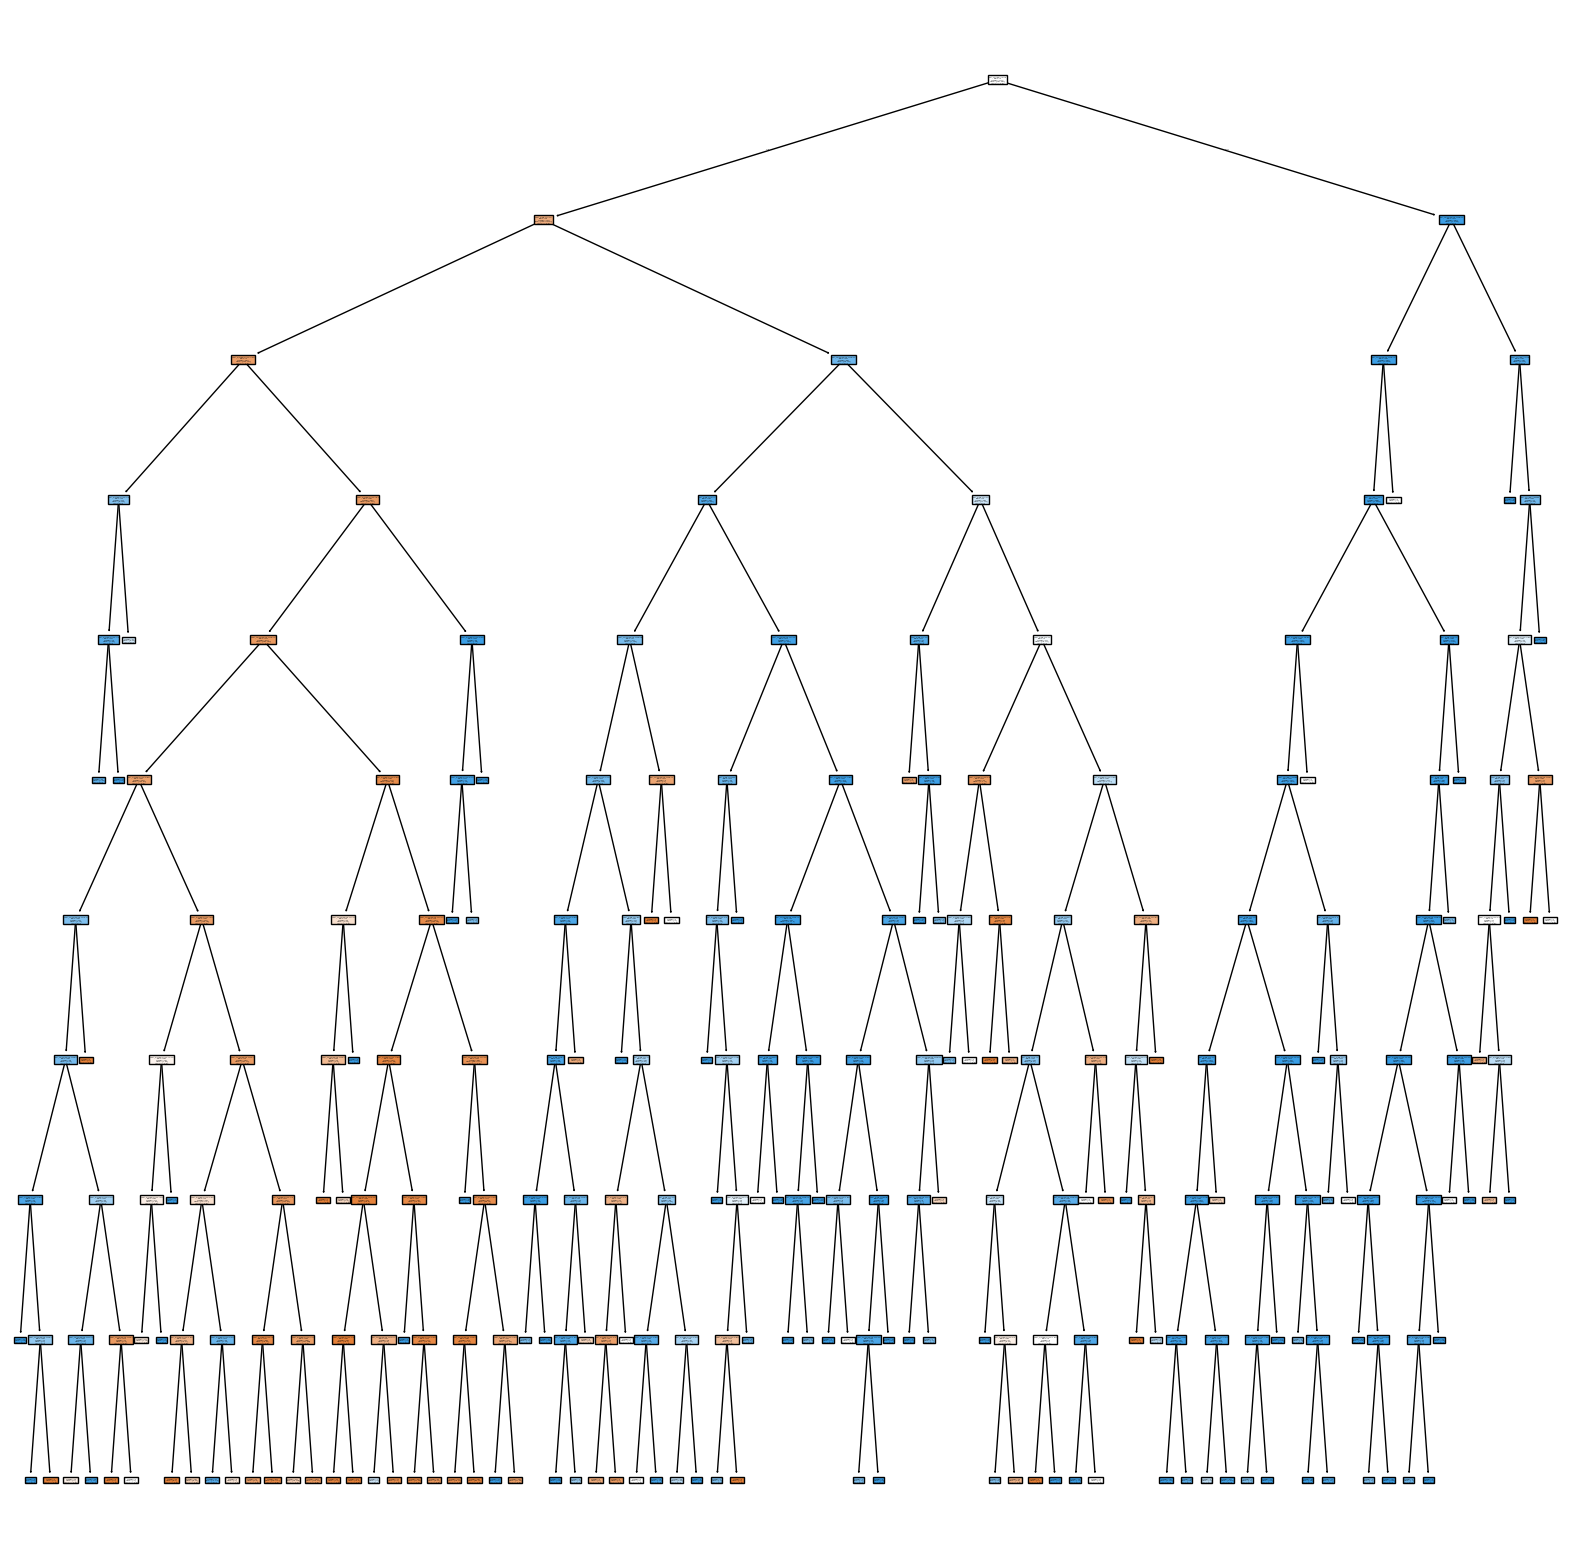

In [44]:
plt.figure(figsize=(20, 20))
tree.plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=['non-failure', 'failure'])
plt.show()


# Anomaly Detection using Isolation Forest

In [45]:
from sklearn.ensemble import IsolationForest

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.01, random_state=42)

# Fit the model on the original data (excluding the 'failure' column)
iso_forest.fit(original_df.drop(columns=['failure']))

# Predict anomalies
anomalies = iso_forest.predict(original_df.drop(columns=['failure']))

# Convert anomalies to boolean (1 for anomaly, -1 for normal)
anomalies = anomalies == -1

# Compare anomalies with failed drives
comparison = pd.DataFrame({'Anomaly': anomalies, 'Failure': original_df['failure']})

# Print the comparison
print(comparison.value_counts())

Anomaly  Failure
False    False      7071
         True       1387
True     False        49
         True         37
Name: count, dtype: int64


# t-SNE

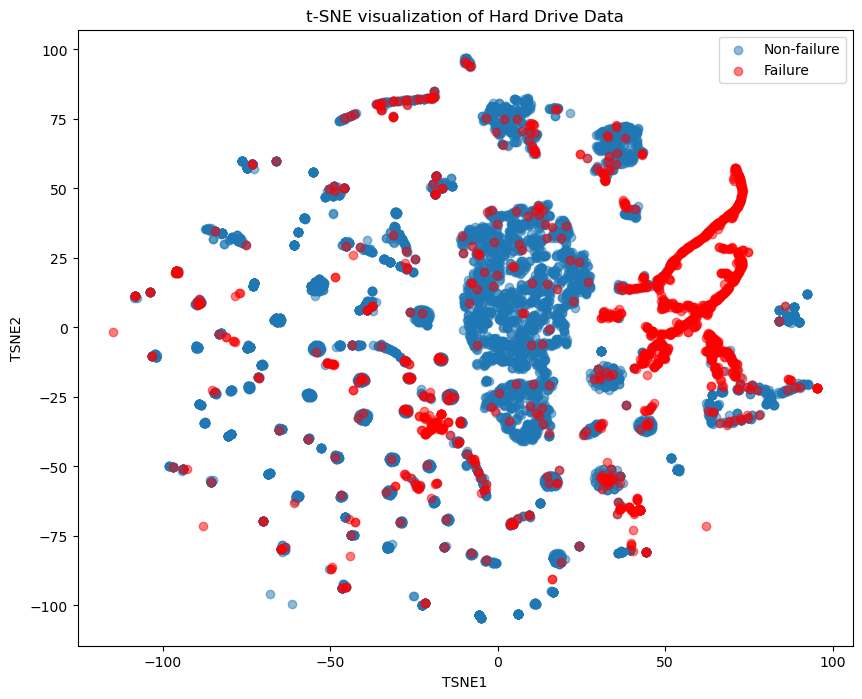

In [48]:
from sklearn.manifold import TSNE

# Initialize the t-SNE model
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data (excluding the 'failure' column)
tsne_results = tsne.fit_transform(original_df.drop(columns=['failure']))

# Create a DataFrame with the t-SNE results
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df['failure'] = original_df['failure'].values

# Plot the t-SNE results
plt.figure(figsize=(10, 8))
plt.scatter(tsne_df[tsne_df['failure'] == False]['TSNE1'], tsne_df[tsne_df['failure'] == False]['TSNE2'], label='Non-failure', alpha=0.5)
plt.scatter(tsne_df[tsne_df['failure'] == True]['TSNE1'], tsne_df[tsne_df['failure'] == True]['TSNE2'], label='Failure', alpha=0.5, color='red')
plt.legend()
plt.title('t-SNE visualization of Hard Drive Data')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()

# LDA and PCA

In [52]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

# Load your DataFrame
# df = pd.read_csv('your_data.csv')  # Uncomment and modify this line to load your data

# Assuming df is your DataFrame and 'target' is your target column
X = original_df.drop(columns=['failure'])
y = original_df['failure']

n_features = X.shape[1]
n_classes = len(set(y))

# LDA
n_components_lda = min(n_features, n_classes - 1)
lda = LinearDiscriminantAnalysis(n_components=n_components_lda)
X_lda = lda.fit_transform(X, y)

# PCA
n_components_pca = min(n_features, 10)  # Adjust 10 to your desired number of components
pca = PCA(n_components=n_components_pca)
X_pca = pca.fit_transform(X)

print(f"LDA components shape: {X_lda.shape}")
print(f"PCA components shape: {X_pca.shape}")

LDA components shape: (8544, 1)
PCA components shape: (8544, 10)


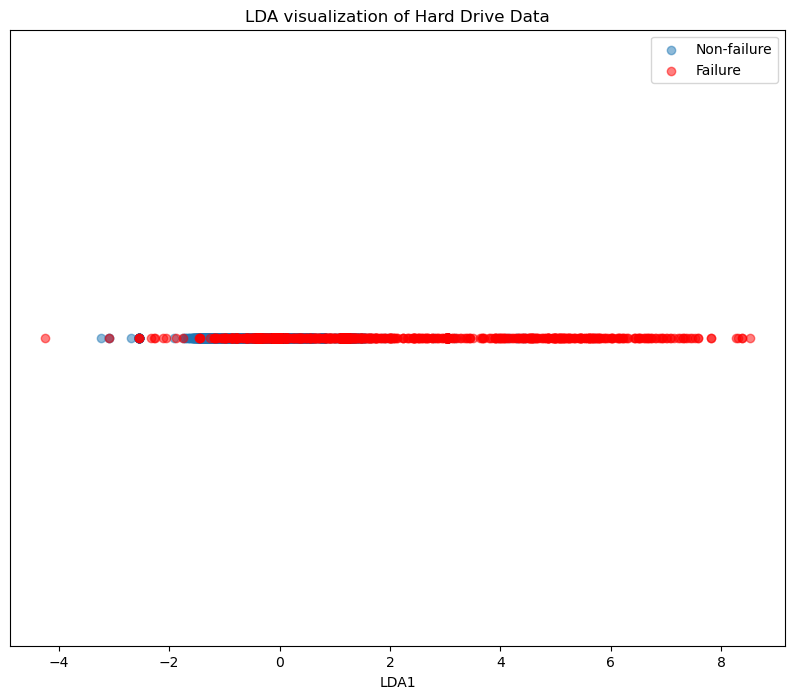

In [55]:
# Create a DataFrame with the LDA results
lda_df = pd.DataFrame(X_lda, columns=['LDA1'])
lda_df['failure'] = y.values

# Plot the LDA results
plt.figure(figsize=(10, 8))
plt.scatter(lda_df[lda_df['failure'] == False]['LDA1'], np.zeros_like(lda_df[lda_df['failure'] == False]['LDA1']), label='Non-failure', alpha=0.5)
plt.scatter(lda_df[lda_df['failure'] == True]['LDA1'], np.zeros_like(lda_df[lda_df['failure'] == True]['LDA1']), label='Failure', alpha=0.5, color='red')
plt.legend()
plt.title('LDA visualization of Hard Drive Data')
plt.xlabel('LDA1')
plt.yticks([])
plt.show()

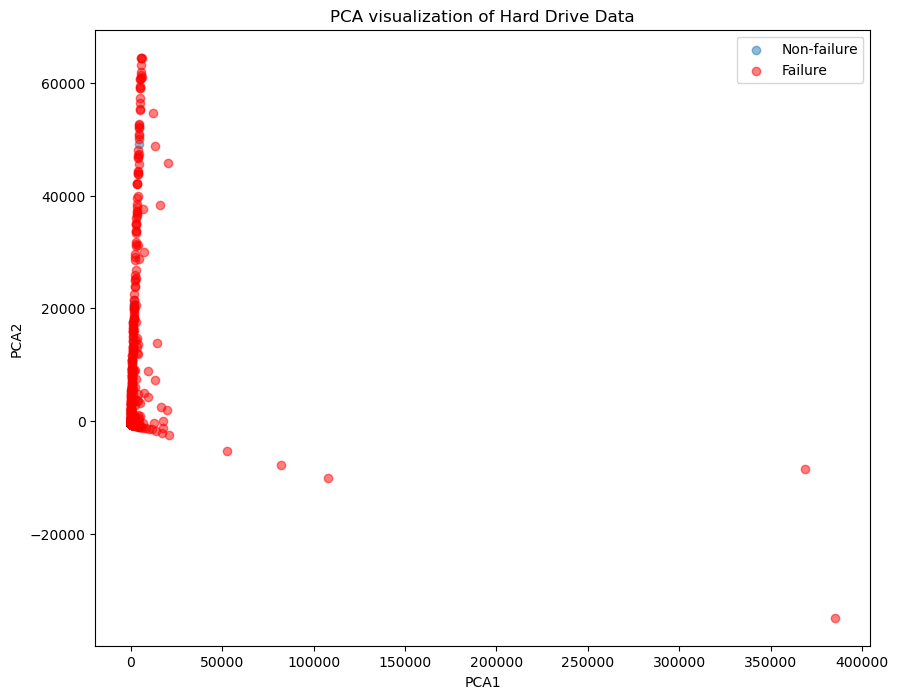

In [57]:
plt.figure(figsize=(10, 8))
plt.scatter(pca_df[pca_df['failure'] == False]['PCA1'], pca_df[pca_df['failure'] == False]['PCA2'], label='Non-failure', alpha=0.5)
plt.scatter(pca_df[pca_df['failure'] == True]['PCA1'], pca_df[pca_df['failure'] == True]['PCA2'], label='Failure', alpha=0.5, color='red')
plt.legend()
plt.title('PCA visualization of Hard Drive Data')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# Initialize the KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model on the original data (excluding the 'failure' column)
kmeans.fit(original_df.drop(columns=['failure']))

# Predict the clusters
clusters = kmeans.predict(original_df.drop(columns=['failure']))

# Add the cluster labels to the original dataframe
original_df['cluster'] = clusters

# Print the first few rows of the dataframe with the cluster labels
print(original_df.head())


        failure  smart_1_normalized  smart_3_normalized  smart_5_normalized  \
123433    False                82.0                91.0               100.0   
23512     False                82.0                85.0               100.0   
56859     False               100.0               100.0               100.0   
121565    False                77.0                92.0               100.0   
49863     False               100.0                 0.0                 0.0   

        smart_5_raw  smart_7_normalized  smart_9_normalized  \
123433          0.0                84.0                53.0   
23512           0.0                96.0                30.0   
56859           0.0               100.0                15.0   
121565          0.0                89.0                88.0   
49863           0.0                 0.0               100.0   

        smart_187_normalized  smart_189_normalized  smart_190_normalized  \
123433                 100.0                   0.0                  71

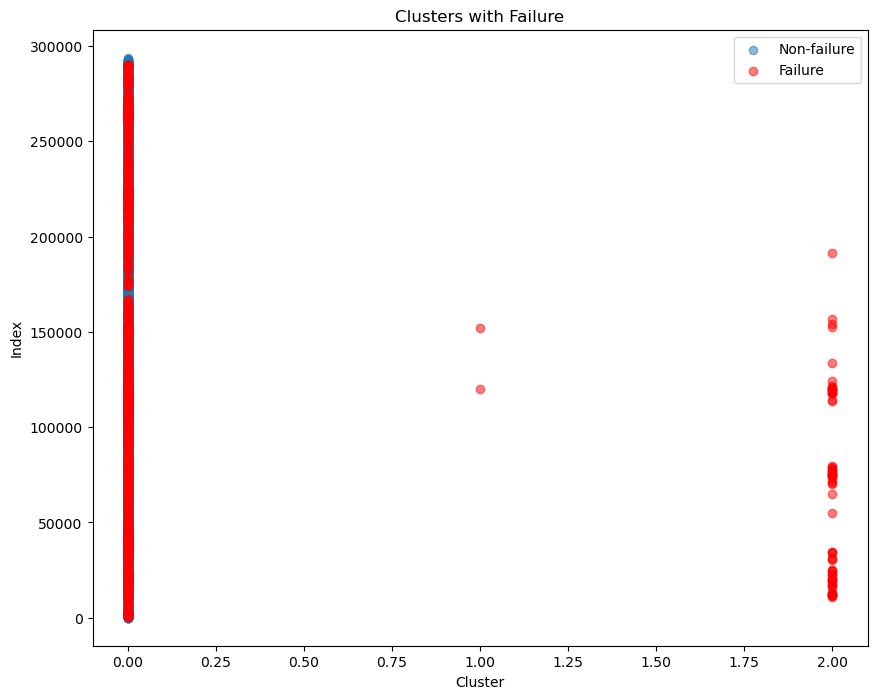

In [59]:
# Plot the clusters with failure
plt.figure(figsize=(10, 8))
plt.scatter(original_df[original_df['failure'] == False]['cluster'], original_df[original_df['failure'] == False].index, label='Non-failure', alpha=0.5)
plt.scatter(original_df[original_df['failure'] == True]['cluster'], original_df[original_df['failure'] == True].index, label='Failure', alpha=0.5, color='red')
plt.legend()
plt.title('Clusters with Failure')
plt.xlabel('Cluster')
plt.ylabel('Index')
plt.show()

In [60]:
from sklearn.cluster import DBSCAN

# Initialize the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the model on the original data (excluding the 'failure' and 'cluster' columns)
dbscan.fit(original_df.drop(columns=['failure', 'cluster']))

# Predict the clusters
dbscan_labels = dbscan.labels_

# Add the DBSCAN cluster labels to the original dataframe
original_df['dbscan_cluster'] = dbscan_labels

# Print the first few rows of the dataframe with the DBSCAN cluster labels
print(original_df.head())

        failure  smart_1_normalized  smart_3_normalized  smart_5_normalized  \
123433    False                82.0                91.0               100.0   
23512     False                82.0                85.0               100.0   
56859     False               100.0               100.0               100.0   
121565    False                77.0                92.0               100.0   
49863     False               100.0                 0.0                 0.0   

        smart_5_raw  smart_7_normalized  smart_9_normalized  \
123433          0.0                84.0                53.0   
23512           0.0                96.0                30.0   
56859           0.0               100.0                15.0   
121565          0.0                89.0                88.0   
49863           0.0                 0.0               100.0   

        smart_187_normalized  smart_189_normalized  smart_190_normalized  \
123433                 100.0                   0.0                  71

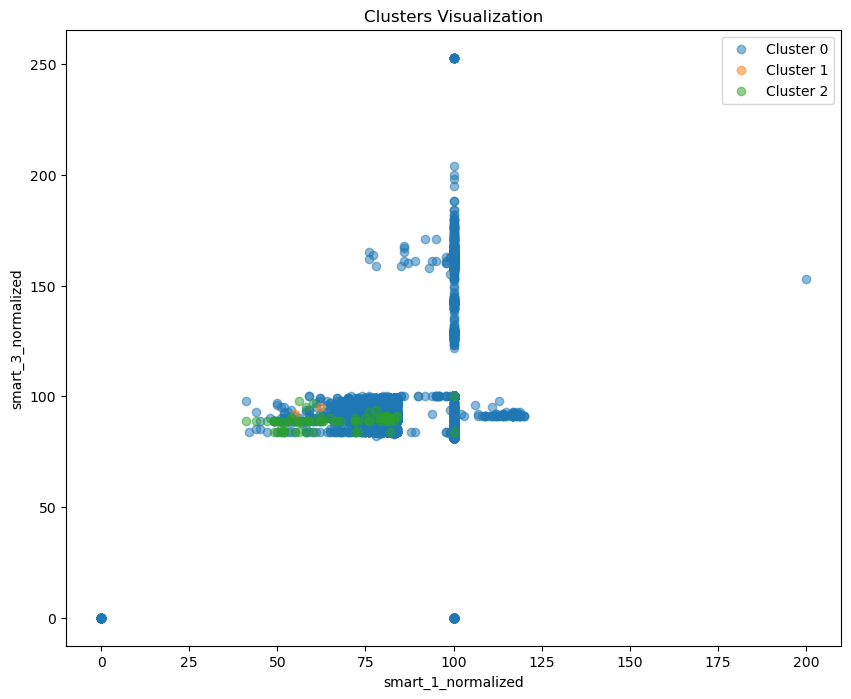

In [61]:
plt.figure(figsize=(10, 8))
plt.scatter(original_df[original_df['cluster'] == 0]['smart_1_normalized'], original_df[original_df['cluster'] == 0]['smart_3_normalized'], label='Cluster 0', alpha=0.5)
plt.scatter(original_df[original_df['cluster'] == 1]['smart_1_normalized'], original_df[original_df['cluster'] == 1]['smart_3_normalized'], label='Cluster 1', alpha=0.5)
plt.scatter(original_df[original_df['cluster'] == 2]['smart_1_normalized'], original_df[original_df['cluster'] == 2]['smart_3_normalized'], label='Cluster 2', alpha=0.5)
plt.legend()
plt.title('Clusters Visualization')
plt.xlabel('smart_1_normalized')
plt.ylabel('smart_3_normalized')
plt.show()

# Identify useful features

In [ ]:
import os
import pandas as pd

def import_data_from_csv(folder_path):
    df = pd.DataFrame()
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".csv") and file_name.startswith("2024-07"):
            print(file_name)
            file_path = os.path.join(folder_path, file_name)
            temp_df = pd.read_csv(file_path)
            columns_to_delete = ['date', 'serial_number', 'model', 'capacity_bytes', 'datacenter', 'cluster_id', 'vault_id', 'pod_id', 'pod_slot_num', 'is_legacy_format']
            temp_df = temp_df.drop(columns=columns_to_delete)
            df = pd.concat([df, temp_df], ignore_index=True)
    return df

folder_path = '../data/external/data_Q3_2024'
df = import_data_from_csv(folder_path)
print(df.head())

2024-07-01.csv
2024-07-02.csv
2024-07-03.csv
2024-07-04.csv
2024-07-05.csv
2024-07-06.csv
2024-07-07.csv
2024-07-08.csv
2024-07-09.csv
2024-07-10.csv
2024-07-11.csv
2024-07-12.csv
2024-07-13.csv
2024-07-14.csv
2024-07-15.csv
2024-07-16.csv
2024-07-17.csv
2024-07-18.csv
2024-07-19.csv
2024-07-20.csv
2024-07-21.csv
2024-07-22.csv
2024-07-23.csv
2024-07-24.csv
2024-07-25.csv
2024-07-26.csv
2024-07-27.csv
2024-07-28.csv


C:\Users\Green\AppData\Local\Temp\ipykernel_3756\3070320935.py:10: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  temp_df = pd.read_csv(file_path)


2024-07-29.csv


C:\Users\Green\AppData\Local\Temp\ipykernel_3756\3070320935.py:10: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  temp_df = pd.read_csv(file_path)


2024-07-30.csv


C:\Users\Green\AppData\Local\Temp\ipykernel_3756\3070320935.py:10: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  temp_df = pd.read_csv(file_path)


2024-07-31.csv


C:\Users\Green\AppData\Local\Temp\ipykernel_3756\3070320935.py:10: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  temp_df = pd.read_csv(file_path)


         date   serial_number                 model  capacity_bytes  failure  \
0  2024-07-01  PL1331LAGXN3AH  HGST HDS5C4040ALE630   4000787030016        0   
1  2024-07-01  PL2331LAGSTSYJ  HGST HMS5C4040ALE640   4000787030016        0   
2  2024-07-01  S2ZYJ9FG405079         ST500LM012 HN    500107862016        0   
3  2024-07-01        Z3056CGY           ST4000DM000   4000787030016        0   
4  2024-07-01        Z305FT10           ST4000DM000   4000787030016        0   

  datacenter  cluster_id  vault_id  pod_id  pod_slot_num  ...  \
0       sac0           0      1021       0          39.0  ...   
1       sac0           0      1021       0           0.0  ...   
2       sac0           0      1021       0           NaN  ...   
3       sac0           0      1021       0          21.0  ...   
4       sac0           0      1021       0          29.0  ...   

   smart_250_normalized  smart_250_raw  smart_251_normalized  smart_251_raw  \
0                   NaN            NaN           

# Correlation matrix with heatmap

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'target' is your target variable
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


MemoryError: Unable to allocate 12.5 GiB for an array with shape (187, 9004260) and data type float64

In [ ]:

print(correlation_matrix)
# Select features with high correlation to the target
correlation_target = abs(correlation_matrix["failure"])
relevant_features = correlation_target[correlation_target > 0.5]
print(relevant_features)

                       failure  smart_1_normalized  smart_3_normalized  \
failure               1.000000           -0.112421            0.109400   
smart_1_normalized   -0.112421            1.000000            0.315468   
smart_3_normalized    0.109400            0.315468            1.000000   
smart_5_normalized   -0.117717            0.268322            0.345212   
smart_5_raw           0.276505           -0.253577           -0.047724   
smart_7_normalized   -0.025509            0.561433            0.519171   
smart_9_normalized   -0.032423            0.181631            0.118755   
smart_187_normalized -0.137827           -0.664639           -0.234652   
smart_189_normalized  0.073584           -0.292076           -0.144431   
smart_190_normalized  0.007533           -0.732721           -0.203517   
smart_195_normalized  0.100386           -0.284802           -0.098128   
smart_197_normalized -0.045560            0.109108            0.226943   
smart_197_raw         0.069542        

KeyError: 'target'

## Univariate Feature Selection

In [6]:
X = df.drop(columns=['failure'])
y = df['failure']

MemoryError: Unable to allocate 12.5 GiB for an array with shape (186, 9004260) and data type float64

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

# Assuming X is your feature matrix and y is your target variable
selector = SelectKBest(score_func=chi2, k=10)
X_new = selector.fit_transform(X, y)

# Get the selected feature indices
selected_features = selector.get_support(indices=True)
print(selected_features)

[ 0  1  2  3  5  6  7  9 10 11]


## Recursive Feature Elimination (RFE)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Assuming X is your feature matrix and y is your target variable
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X, y)

# Get the selected feature indices
selected_features = fit.support_
print(selected_features)